<a href="https://colab.research.google.com/github/Tarciso-Cavalcanti/UFPB-Python/blob/main/Relat%C3%B3rio_Unidade_III_Tarciso_Cavalcanti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**RELATÓRIO FINAL: DA UNIDADE III - DISCIPLINA DE ESTÁGIO IV**

---
---

#**INTRODUÇÃO**

#**Conjunto de dados de análise e previsão de ataque cardíaco**


###O presente trabalho busca compreender quais os fatores que contribuem para que um indivíduo venha a ter mais ou menos chances de sofrer um ataque cardíaco.

###Dados disponíveis no site da Kaggle, através do endereço: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#**Variáveis Analisadas:**



1.   age: Idade do paciente

2.   sex: Sexo do paciente (0 = mulher; 1 = homem)

3.   cp: Tipo de dor no peito
    *   1 = Angina típica
    *   2 = Angina atípica
    *   3 = Dor não anginosa
    *   4 = Assintomático

4.   trtbps: Pressão arterial em repouso (em mm Hg)

5.   chol: Colesterol em mg/dl obtido através do sensor de IMC

6.   fbs: Glicemia em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso)

7.   restecg: resultados eletrocardiográficos em repouso
    *   0 = Normal
    *   1 = Com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV)
    *   2 = Mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes

8.   thalachh: Frequência cardíaca máxima atingida

9.   exng: Angina induzida pelo exercício (1 = sim; 0 = não)

10.   **output: 0= menos chance de ataque cardíaco 1= mais chance de ataque cardíaco**









#**DESENVOLVIMENTO**

##**Tratamento do Banco de Dados**

In [6]:
#Importando bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [7]:
#Atribuindo o banco de dados utilizado à palavra "dados"
dados = pd.read_csv('heart.csv')

In [8]:
#Lendo as primeiras 10 linhas do banco de dados
dados.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
#Lendo as últimas 10 linhas do banco de dados
dados.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
#Lendo as primeiras 5 e últimas 5 linhas do banco de dados
dados

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
#Obtendo informações sobre o banco de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Antes de iniciar-se a análise descritiva será feita uma adequação ao banco de dados em três partes:**

1.   Verificar se há algum paciente duplicado;

2.   Remover as variáveis "oldpeak", "slp", "caa" e "thall", por o local de onde foi retirado o banco de dados não conter informações sobre o que elas são exatamente;

3.   Traduzir as variáveis, para facilitar a manipulação e compreensão dos dados.



In [12]:
#Verificação de duplicidade
sum(dados.duplicated()) 

1

In [13]:
#Remoção de variáveis
pacientes = dados.drop(['oldpeak','slp', 'caa', 'thall'], axis=1)
pacientes

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,output
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0
299,45,1,3,110,264,0,1,132,0,0
300,68,1,0,144,193,1,1,141,0,0
301,57,1,0,130,131,0,1,115,1,0


In [14]:
#Tradução das variáveis
col_portugues = {
    'age':'Idade',
    'sex':'Sexo',
    'cp':'TipoDor',
    'trtbps':'PressaoArterial',
    'chol':'Colesterol',
    'fbs':'Glicemia',
    'restecg':'Eletro',
    'thalachh':'FreqCardMaxima',
    'exng':'AnginaInduzida',
    'output':'ChanceInfarto'
}
col_ingles = list(pacientes.columns)
col_novas = [col_portugues[i] for i in col_ingles]
pacientes.columns = col_novas
pacientes

,Idade,Sexo,TipoDor,PressaoArterial,Colesterol,Glicemia,Eletro,FreqCardMaxima,AnginaInduzida,ChanceInfarto
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0
299,45,1,3,110,264,0,1,132,0,0
300,68,1,0,144,193,1,1,141,0,0
301,57,1,0,130,131,0,1,115,1,0


###Como só foi encontrado um dado repetido, pode ser que tenha sido apenas dois pacientes com a mesma idade e caracteristicas clínicas. Neste caso foi optado por não remover esta duplicidade, dada a falta de certeza que ralmente se trata da mesma pessoa.

###No mais, a remoção e tradução das variáveis foram realizadas com sucesso.

#**Análise Descritiva**

In [15]:
#Quantitativo da variável de interesse
pacientes.groupby('ChanceInfarto').count()

,Idade,Sexo,TipoDor,PressaoArterial,Colesterol,Glicemia,Eletro,FreqCardMaxima,AnginaInduzida
ChanceInfarto,,,,,,,,,
0,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165


###Como a variável de interesse deste trabalho é a "ChanceInfarto", a análise foi iniciada com o quantitativo de pacientes que tem menos chances (138) e mais chances (165) de vir a ter um infarto.

#**Análise das Variáveis Quantitavivas**

In [16]:
#Segregando o banco para utilizar apenas as variáveis quantitativas
quantitativas = pacientes.drop(['Sexo','TipoDor','Glicemia','Eletro','AnginaInduzida','ChanceInfarto'], axis=1)
quantitativas

,Idade,PressaoArterial,Colesterol,FreqCardMaxima
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163
...,...,...,...,...
298,57,140,241,123
299,45,110,264,132
300,68,144,193,141
301,57,130,131,115


In [17]:
#Medidas de posição e dispersão das variáveis
quantitativas.describe()

,Idade,PressaoArterial,Colesterol,FreqCardMaxima
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


In [18]:
#Coefiiete de Variação da Idade
cv1 = 9.082101/54.366337; cv1

0.16705375975578415

In [19]:
#Coefiiete de Variação da Pressão Arterial
cv2 = 17.538143/131.623762; cv2

0.13324450489418468

In [20]:
#Coefiiete de Variação do Colesterol
cv3 = 51.830751/246.264026; cv3

0.21046821917871186

In [21]:
#Coefiiete de Variação da Fequência Cardíaca Máxima
cv4 = 22.90511/149.646865; cv4

0.153061074817705

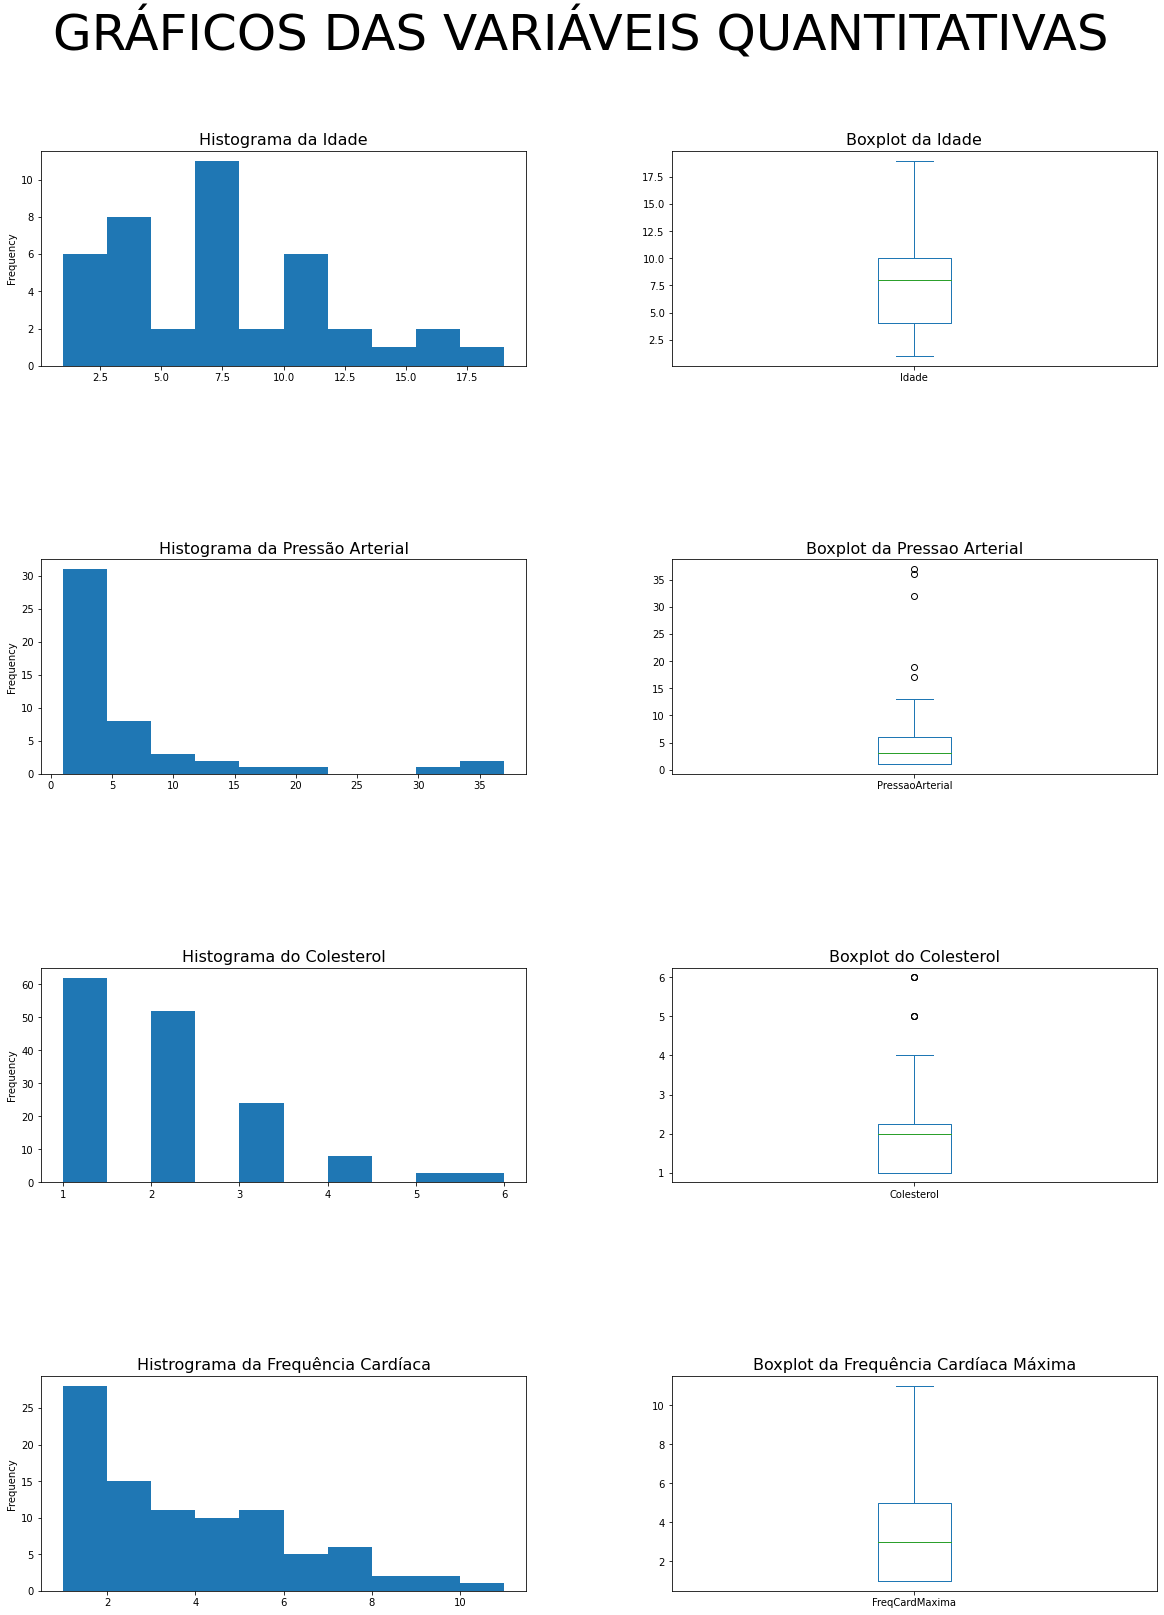

In [22]:
#Gráficos das variáveis quantitativas
grafico_Idade = quantitativas["Idade"].value_counts()
grafico_PressaoArterial = quantitativas["PressaoArterial"].value_counts()
grafico_Colesterol = quantitativas["Colesterol"].value_counts()
grafico_FreqCardMaxima = quantitativas["FreqCardMaxima"].value_counts()

plt.figure(figsize = ((20, 25)))

plt.subplot(4, 2, 1)
grafico_Idade.plot.hist()
plt.title("Histograma da Idade", fontsize = 16)

plt.subplot(4, 2, 2)
grafico_Idade.plot.box()
plt.title("Boxplot da Idade", fontsize = 16)

plt.subplot(4, 2, 3)
grafico_PressaoArterial.plot.hist()
plt.title("Histograma da Pressão Arterial", fontsize = 16)

plt.subplot(4, 2, 4)
grafico_PressaoArterial.plot.box()
plt.title("Boxplot da Pressao Arterial", fontsize = 16)

plt.subplot(4, 2, 5)
grafico_Colesterol.plot.hist()
plt.title("Histograma do Colesterol", fontsize = 16)

plt.subplot(4, 2, 6)
grafico_Colesterol.plot.box()
plt.title("Boxplot do Colesterol", fontsize = 16)

plt.subplot(4, 2, 7)
grafico_FreqCardMaxima.plot.hist()
plt.title("Histrograma da Frequência Cardíaca", fontsize = 16)

plt.subplot(4, 2, 8)
grafico_FreqCardMaxima.plot.box()
plt.title("Boxplot da Frequência Cardíaca Máxima", fontsize = 16)

plt.suptitle("GRÁFICOS DAS VARIÁVEIS QUANTITATIVAS", fontsize = 50)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.9)

plt.show()

In [23]:
#Dataframe relacionando as variáveis quantitativas com a chance de infarto
quanti = pacientes.drop(['Sexo','TipoDor', 'Glicemia', 'Eletro','AnginaInduzida'], axis=1)
quanti.groupby(['ChanceInfarto'])['Idade','PressaoArterial','Colesterol','FreqCardMaxima'].agg(['mean','median','count'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Idade              PressaoArterial               \
                    mean median count            mean median count   
ChanceInfarto                                                        
0              56.601449   58.0   138      134.398551  130.0   138   
1              52.496970   52.0   165      129.303030  130.0   165   

               Colesterol              FreqCardMaxima               
                     mean median count           mean median count  
ChanceInfarto                                                       
0              251.086957  249.0   138     139.101449  142.0   138  
1              242.230303  234.0   165     158.466667  161.0   165

##**Análise Individual das Variáveis Quantitativas:**

*   **Idade:**
    
    Ao observar-se a idade dos pacientes analisados, nota-se que o gráfico do boxplot apresenta certa centralização dos dados, indicando que há simetria em sua distribuição, que é visualmente observável no gráfico do histograma, que não apresenta outliers em sua distribuição. Isto é corroborado ao observar-se que os valores da média (54.366337) e da Mediana (55) são próximos. Vale ressaltar que, devido o Coeficiente de Variação ser inferior a 25%, há indicios de homogeneidade nos dados.

    Ao compararmos a variável Idade com a chance de um paciente infartar ser maior ou menor, observa-se que a média de idade dos pacientes que tem menos chances de infarto (56.601449) é maior que a média dos pacientes com mais chance de infarto (52.496970), indicando que, dentre os pacientes analisados, os mais velhos apresentam menos chances de enfartar.

*   **Pressão Arterial:**

    Ao observar-se a Pressão Arterial dos pacientes analisados, nota-se que o gráfico do boxplot apresenta certa descentralização dos dados, indicando que há assimetria em sua distribuição, que é visualmente observável no gráfico do histograma, que indica a presença de outliers em sua distribuição. Apesar da descentralização dos dados, observa-se que há pouca distância entre os valores da média (131.623762) e da Mediana (130), mas mesmo assim, o fato de a média ser superior, indica que a maioria dos pacientes analisados apresentaram Pressão Arterial abaixo da média. Vale ressaltar que, devido o Coeficiente de Variação ser inferior a 25%, há indicios de homogeneidade nos dados.

    Ao compararmos a variável Pressão Arterial com a chance de um paciente infartar ser maior ou menor, observa-se que a média da Pressão Arterial dos pacientes que tem menos chances de infarto (134.398551) é maior que a média dos pacientes com mais chance de infarto (129.303030), indicando que, dentre os pacientes analisados, os que tem a Pressão Arterial mais elevada, apresentam menos chances de enfartar.

*   **Colesterol:**

    Ao observar-se o Colesterol dos pacientes analisados, nota-se que o gráfico do boxplot apresenta certa descentralização dos dados, indicando que há assimetria em sua distribuição, que é visualmente observável no gráfico do histograma, que indica a presença de outliers em sua distribuição. Nota-se que há certa distância entre os valores da média (246.264026) e da Mediana (130), com o fato de a média ser superior, indicando que a maioria dos pacientes analisados apresentaram Colesterol abaixo da média. Vale ressaltar que, devido o Coeficiente de Variação ser inferior a 25%, há indicios de homogeneidade nos dados.

    Ao compararmos a variável Colesterol com a chance de um paciente infartar ser maior ou menor, observa-se que a média do Colesterol presente no sangue dos pacientes que tem menos chances de infarto (251.086957) é maior que a média dos pacientes com mais chance de infarto (242.230303), indicando que, dentre os pacientes analisados, os que tem a quantidade de Colesterol mais elevada no sangue, apresentam menos chances de enfartar.

*   **Frequência Cardíaca Máxima:**

    Ao observar-se a Frequência Cardíaca Máxima dos pacientes analisados, nota-se que o gráfico do boxplot apresenta certa centralização dos dados, indicando que há simetria em sua distribuição, que é visualmente observável no gráfico do histograma, que não apresenta outliers em sua distribuição. Isto é corroborado ao observar-se que os valores da média (149.646865) e da Mediana (153) serem relativamente próximos, mas como há uma pequena distância, com a média sendo inferior, é certo dizer que a maioria dos pacientes analisados apresentaram a Frequência Cardíaca Máxima acima da média. Vale ressaltar que, devido o Coeficiente de Variação ser inferior a 25%, há indicios de homogeneidade nos dados.

    Ao compararmos a variável Frequência Cardíaca Máxima com a chance de um paciente infartar ser maior ou menor, observa-se que a média de idade dos pacientes que tem menos chances de infarto (139.101449) é menor que a média dos pacientes com mais chances de infarto (158.466667), indicando que, dentre os pacientes analisados, os que obtiveram um maior pico de Frequência Cardíaca apresentam mais chances de enfartar.

#**Análise das Variáveis Qualitavivas**

In [24]:
#Segregando o banco para utilizar apenas as variáveis qualitativas
qualitativas = pacientes.drop(['Idade','PressaoArterial','Colesterol','FreqCardMaxima','ChanceInfarto'], axis=1)
qualitativas

,Sexo,TipoDor,Glicemia,Eletro,AnginaInduzida
0,1,3,1,0,0
1,1,2,0,1,0
2,0,1,0,0,0
3,1,1,0,1,0
4,0,0,0,1,1
...,...,...,...,...,...
298,0,0,0,1,1
299,1,3,0,1,0
300,1,0,1,1,0
301,1,0,0,1,1


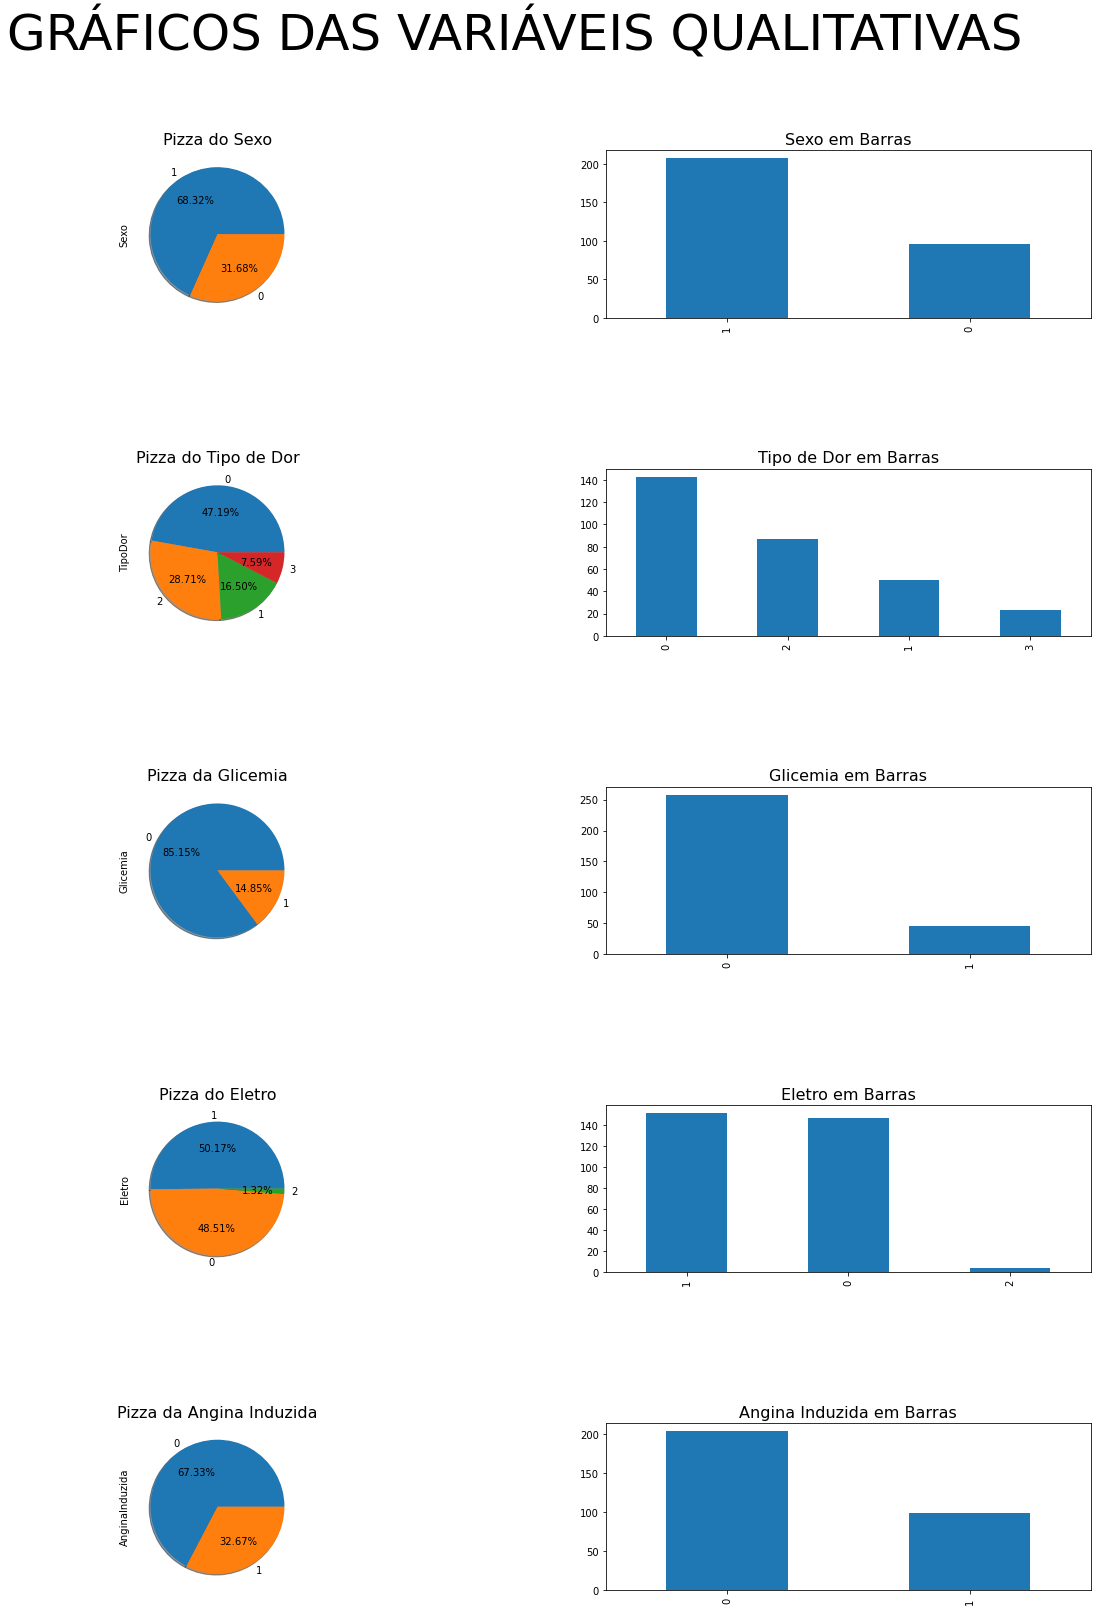

In [25]:
#Gráficos das variáveis qualitativas
grafico_Sexo = qualitativas["Sexo"].value_counts()
grafico_TipoDor = qualitativas["TipoDor"].value_counts()
grafico_Glicemia = qualitativas["Glicemia"].value_counts()
grafico_Eletro = qualitativas["Eletro"].value_counts()
grafico_AnginaInduzida = qualitativas["AnginaInduzida"].value_counts()

plt.figure(figsize = ((20, 25)))

plt.subplot(5, 2, 1)
grafico_Sexo.plot.pie(autopct="%.2f%%",shadow=True)
plt.title("Pizza do Sexo", fontsize = 16)

plt.subplot(5, 2, 2)
grafico_Sexo.plot.bar()
plt.title("Sexo em Barras", fontsize = 16)

plt.subplot(5, 2, 3)
grafico_TipoDor.plot.pie(autopct="%.2f%%",shadow=True)
plt.title("Pizza do Tipo de Dor", fontsize = 16)

plt.subplot(5, 2, 4)
grafico_TipoDor.plot.bar()
plt.title("Tipo de Dor em Barras", fontsize = 16)

plt.subplot(5, 2, 5)
grafico_Glicemia.plot.pie(autopct="%.2f%%",shadow=True)
plt.title("Pizza da Glicemia", fontsize = 16)

plt.subplot(5, 2, 6)
grafico_Glicemia.plot.bar()
plt.title("Glicemia em Barras", fontsize = 16)

plt.subplot(5, 2, 7)
grafico_Eletro.plot.pie(autopct="%.2f%%",shadow=True)
plt.title("Pizza do Eletro", fontsize = 16)

plt.subplot(5, 2, 8)
grafico_Eletro.plot.bar()
plt.title("Eletro em Barras", fontsize = 16)

plt.subplot(5, 2, 9)
grafico_AnginaInduzida.plot.pie(autopct="%.2f%%",shadow=True)
plt.title("Pizza da Angina Induzida", fontsize = 16)

plt.subplot(5, 2, 10)
grafico_AnginaInduzida.plot.bar()
plt.title("Angina Induzida em Barras", fontsize = 16)

plt.suptitle("GRÁFICOS DAS VARIÁVEIS QUALITATIVAS", fontsize = 50)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.9)

plt.show()

In [26]:
#Exibindo a correlação entre as variáveis qualitativas e cruzando estas relações com a variável de interese "ChanceInfarto"
quali = pacientes.drop(['Idade','PressaoArterial','Colesterol','FreqCardMaxima'], axis=1)
quali.groupby('ChanceInfarto').corr()

Sexo   TipoDor  Glicemia    Eletro  \
ChanceInfarto                                                          
0             Sexo            1.000000  0.158391 -0.113533 -0.078597   
              TipoDor         0.158391  1.000000 -0.011442  0.049831   
              Glicemia       -0.113533 -0.011442  1.000000 -0.105849   
              Eletro         -0.078597  0.049831 -0.105849  1.000000   
              AnginaInduzida -0.030079 -0.392959  0.074977  0.050105   
1             Sexo            1.000000  0.039321  0.142416  0.018542   
              TipoDor         0.039321  1.000000  0.227776 -0.073879   
              Glicemia        0.142416  0.227776  1.000000 -0.057736   
              Eletro          0.018542 -0.073879 -0.057736  1.000000   
              AnginaInduzida  0.071849 -0.104002 -0.060931 -0.092503   

                              AnginaInduzida  
ChanceInfarto                                 
0             Sexo                 -0.030079  
              TipoDor              -0.392959  
              Glicemia              0.074977  
              Eletro                0.050105  
              AnginaInduzida        1.000000  
1             Sexo                  0.071849  
              TipoDor              -0.104002  
              Glicemia             -0.060931  
              Eletro               -0.092503  
              AnginaInduzida        1.000000

In [27]:
#Cruzamento da Chance de Infarte com o Sexo
quali.groupby(['ChanceInfarto','Sexo']).size().unstack(1)

Sexo,0,1
ChanceInfarto,,
0,24,114
1,72,93


In [28]:
#Percentual de pacientes com mais chances de enfartar por Sexo
quali.groupby('Sexo')["ChanceInfarto"].mean()

Sexo
0    0.750000
1    0.449275
Name: ChanceInfarto, dtype: float64

In [29]:
#Cruzamento da Chance de Infarte com o Tipo de Dor
quali.groupby(['ChanceInfarto','TipoDor']).size().unstack(1)

TipoDor,0,1,2,3
ChanceInfarto,,,,
0,104,9,18,7
1,39,41,69,16


In [33]:
#Percentual de pacientes com mais chances de enfartar por Tipo de Dor
quali.groupby('TipoDor')["ChanceInfarto"].mean()

TipoDor
0    0.272727
1    0.820000
2    0.793103
3    0.695652
Name: ChanceInfarto, dtype: float64

In [30]:
#Cruzamento da Chance de Infarte com a Glicemia
quali.groupby(['ChanceInfarto','Glicemia']).size().unstack(1)

Glicemia,0,1
ChanceInfarto,,
0,116,22
1,142,23


In [34]:
#Percentual de pacientes com mais chances de enfartar por Glicemia
quali.groupby('Glicemia')["ChanceInfarto"].mean()

Glicemia
0    0.550388
1    0.511111
Name: ChanceInfarto, dtype: float64

In [31]:
#Cruzamento da Chance de Infarte com o Eletro
quali.groupby(['ChanceInfarto','Eletro']).size().unstack(1)

Eletro,0,1,2
ChanceInfarto,,,
0,79,56,3
1,68,96,1


In [35]:
#Percentual de pacientes com mais chances de enfartar por Eletro
quali.groupby('Eletro')["ChanceInfarto"].mean()

Eletro
0    0.462585
1    0.631579
2    0.250000
Name: ChanceInfarto, dtype: float64

In [32]:
#Cruzamento da Chance de Infarte com a Angina Induzida
quali.groupby(['ChanceInfarto','AnginaInduzida']).size().unstack(1)

AnginaInduzida,0,1
ChanceInfarto,,
0,62,76
1,142,23


In [36]:
#Percentual de pacientes com mais chances de enfartar por Angina Induzida
quali.groupby('AnginaInduzida')["ChanceInfarto"].mean()

AnginaInduzida
0    0.696078
1    0.232323
Name: ChanceInfarto, dtype: float64

##**Análise Individual das Variáveis Qualitativas:**

*   **Sexo:**
    
    Pode-se observar com auxilio dos gráficos e do dataframe que 96 (31,68%) dos pacientes analisados são mulheres, enquanto 207 (68,32%) são homens. Onde das 96 mulheres analisadas, apenas 24 apresentaram menos chances de sofrer enfarto, com as outras 72 apresentando mais chances de sofrer um infarto, isto implica dizer que 75% das mulheres analisadas apresentaram mais chances de sofrer um infarto. Já sobre os homens, observou-se que 114 dos 207 apresentaram menos chances de sofrer um infarto, enquanto os outros 93 apresentaram mais chances de sofrer um infarto, isto implica dizer que 44,93% dos homens analisados apresentaram mais chances de sofrer um infarto.

    Desta forma pode-se concluir que, dentre os pacientes analisados, as mulheres possuem mais chances de enfartar do que os homens.

*   **Tipo de Dor:**

    Pode-se observar com auxilio dos gráficos e do dataframe que 143 (47,19%) dos pacientes analisados tem dores no peito ocasionada pela presença de uma angina típica, 50 (16,50%) tem dores no peito ocasionada pela presença de uma agina atípica, 87 (28,71%) tem dores no peito sem a presença de angina e 23 (7,59%) não aresentaram dor no peito. Onde dos 143 pacientes com dor derivada de angina típica, 104 apresentaram menos chances de sofrer enfarto, com as outras 39 apresentando mais chances de sofrer um infarto, isto implica dizer que 27,27% dos pacientes com este tipo de dor apresentaram mais chances de sofrer um infarto. Já sobre os pacientes com dor derivada de angina atípica, observou-se que 9 dos 50 apresentaram menos chances de sofrer um infarto, enquanto os outros 41 apresentaram mais chances de sofrer um infarto, isto implica dizer que 82% dos pacientes com este tipo de dor apresentaram mais chances de sofrer um infarto. Sobre os pacientes com dor sem a presença de angina, observou-se que 18 dos 87 apresentaram menos chances de sofrer um infarto, enquanto os outros 69 apresentaram mais chances de sofrer um infarto, isto implica dizer que 79,31% dos pacientes com este tipo de dor apresentaram mais chances de sofrer um infarto. Por fim, sobre os pacientes sem a presença de dor no peito, observou-se que 7 dos 23 apresentaram menos chances de sofrer um infarto, enquanto os outros 16 apresentaram mais chances de sofrer um infarto, isto implica dizer que 69,57% dos pacientes sem a presença de dor no peito apresentaram mais chances de sofrer um infarto.

    Desta forma pode-se concluir que, dentre os pacientes analisados, os que possuem dores no peito ocasionada pela presença de angina típica possuem menos chances de enfartar do que os demais, com destaque para os pacientes com angina atípica, que apresentaram mais chances de infarto que os demais.

*   **Glicemia:**

    Pode-se observar com auxilio dos gráficos e do dataframe que 258 (85,15%) dos pacientes analisados tem Glicemia igual ou inferior a 120mg/dl ,enquanto 45 (14,85%) possuem Glicemia Superior a 120mg/dl. Onde dos 258 pacientes analisados com glicemia igual ou inferior a 120mh/dl, 116 apresentaram menos chances de sofrer enfarto, com os outros 142 apresentando mais chances de sofrer um infarto, isto implica dizer que 55,04% dos pacientes analisados com este nível de Glicemia apresentaram mais chances de sofrer um infarto. Já sobre os pacientes com Glicemia superior a 120mg/dl, observou-se que 22 dos 45 apresentaram menos chances de sofrer um infarto, enquanto os outros 23 apresentaram mais chances de sofrer um infarto, isto implica dizer que 51,11% dos pacientes analisados com este nível de Glicemia apresentaram mais chances de sofrer um infarto.

    Desta forma pode-se concluir que, dentre os pacientes analisados, os que tem Glicemia igual ou inferior a 120mg/dl possuem mais chances de enfartar do que os com Glicemia superior a 120mg/dl.

*   **Eletro:**

    Pode-se observar com auxilio dos gráficos e do dataframe que 147 (48,51%) dos pacientes analisados não apresentaram anormalidades no Eletro, 152 (50,17%) apresentaram anormalidade da onda ST-T e 4 (1,32%) apresentaram possibilidade/presença de hipertrofia ventricular esquerda. Onde dos 147 pacientes sem anormalidades no Eletro, 79 apresentaram menos chances de sofrer enfarto, com as outras 68 apresentando mais chances de sofrer um infarto, isto implica dizer que 46,2% dos pacientes com este resultado no Eletro apresentaram mais chances de sofrer um infarto. Já sobre os pacientes com presença de anormalidade da onda ST-T, observou-se que 56 dos 152 apresentaram menos chances de sofrer um infarto, enquanto os outros 96 apresentaram mais chances de sofrer um infarto, isto implica dizer que 63,16% dos pacientes com este resultado no Eletro apresentaram mais chances de sofrer um infarto. Por fim, sobre os pacientes com possibilidade/presença de hipertrofia ventricular esquerda, observou-se que 3 dos 4 apresentaram menos chances de sofrer um infarto, enquanto o outro 1 apresentou mais chances de sofrer um infarto, isto implica dizer que 25% dos pacientes scom este resultado no Eletro apresentaram mais chances de sofrer um infarto.

    Desta forma pode-se concluir que, dentre os pacientes analisados, os que tem anormalidade da onda ST-T possuem mais chances de enfartar do que os demais, vale ressaltar que apesar de os pacientes com possibilidade/presença de hipertrofia ventricular esquerda terem apresentado as menores chances de infarto que os demais, eles são apenas 1,32% da amostra, logo não pode-se dar tanta relevância.

*   **Angina Induzida:**

    Pode-se observar com auxilio dos gráficos e do dataframe que 204 (67,33%) dos pacientes analisados não tem a presença de Angina Induzida por exercício, enquanto 99 (32,67%) tem a presença de Angina Induzida por exercício. Onde dos 204 pacientes analisados sem a presença de Angina Induzida por exercício, 62 apresentaram menos chances de sofrer enfarto, com os outros 142 apresentando mais chances de sofrer um infarto, isto implica dizer que 69,61% dos pacientes analisados sem a presença Angina Induzida por exercício apresentaram mais chances de sofrer um infarto. Já sobre os pacientes com a presença de Angina Induzida por exercício, observou-se que 76 dos 99 apresentaram menos chances de sofrer um infarto, enquanto os outros 23 apresentaram mais chances de sofrer um infarto, isto implica dizer que 23,23% dos pacientes analisados com a presença de Angina Induzida por exercício apresentaram mais chances de sofrer um infarto.

    Desta forma pode-se concluir que, dentre os pacientes analisados, os que não tem Angina Induzida por exercíco possuem mais chances de enfartar do que os tem Angina Induzida por exercício.

#**CONCLUSÃO**


A análise foi satisfatória, visto que pôde-se compreender, de forma exploratória, a relação das variáveis independentes com a variável de interesse. Enfatizando que a análise não tem fins preditivos, obteve-se como principais achados:



1.   **Idade:** Pacientes mais velhos apresentaram menos chances de enfartar;

2.   **Sexo:** Pacientes do sexo masculino apresentaram menos chances de enfartar;

3.   **Tipo de Dor:** Pacientes com presença de Angina típica apresentaram menos chances de enfartar que os demais, enquanto os pacientes com presença de Angina atípica apresentaram mais chances de enfartar que os demais;

4.   **Presão Arterial:** Pacientes com a Pressão Arterial mais elevada apresentaram menos chances de enfartar;

5.   **Colesterol:** Pacientes com o nível de Colesterol mais elevado apresentarm menos chances de enfartar;

6.   **Glicemia:** Pacientes com Glicemia superior a 120mg/dl apresentaram menos chances de enfartar

7.   **Eletro:** Pacientes com possibilidade/presença de hipertrofia ventricular esquerda apresentaram menos chances de enfartar que os demais, enquanto os pacientes com presença de anormalidade da onda ST-T apresentaram mais chances de enfartar que os demais;

8.   **Frequência Cardíaca Máxima:** Pacientes com a o pico da Frequência Cardáca menos elevados apresentaram menos chances de enfartar;

9.   **Angina Induzida:** Pacientes com a presença de Angina Induzida por execício apresentaram menos chances de enfartar;

#**LIMITAÇÕES**

Foram encontradas certas limitações ao utilizar este bano de dados, visto que o local de origem do banco carece de de informações sobe as variáveis "oldpeak", "slp", "caa" e "thall", de modo que dificulta a compreensão a cerca destas variáveis por pessoas que não são da área, impossibilitando a análise acerca delas. Todavia o problema foi resolvido ao excluir elas dos dados.

Sobre a variável "sex", na origem do banco não havia a indicação sobre a correspondência de feminino e masculino para 0 e 1, porém foi possível observar nos comentários que as pessoas estavam interpretando o 0 como feminino e o 1 como masculino. Isto foi tomado como base para o desenvolvimento deste trabalho.

#**REFERÊNCIAS**

Sites utilizados:

https://www.vooo.pro/insights/biblioteca-seaborn-com-o-matplotlib/

https://insightlab.ufc.br/10-funcoes-mais-usadas-para-manipular-dataframes-no-pandas

https://pythonacademy.com.br/blog/dataframes-do-pandas

https://www.youtube.com/watch?v=1J3ZRzw7SuA